# Heart Disease Risk Prediction

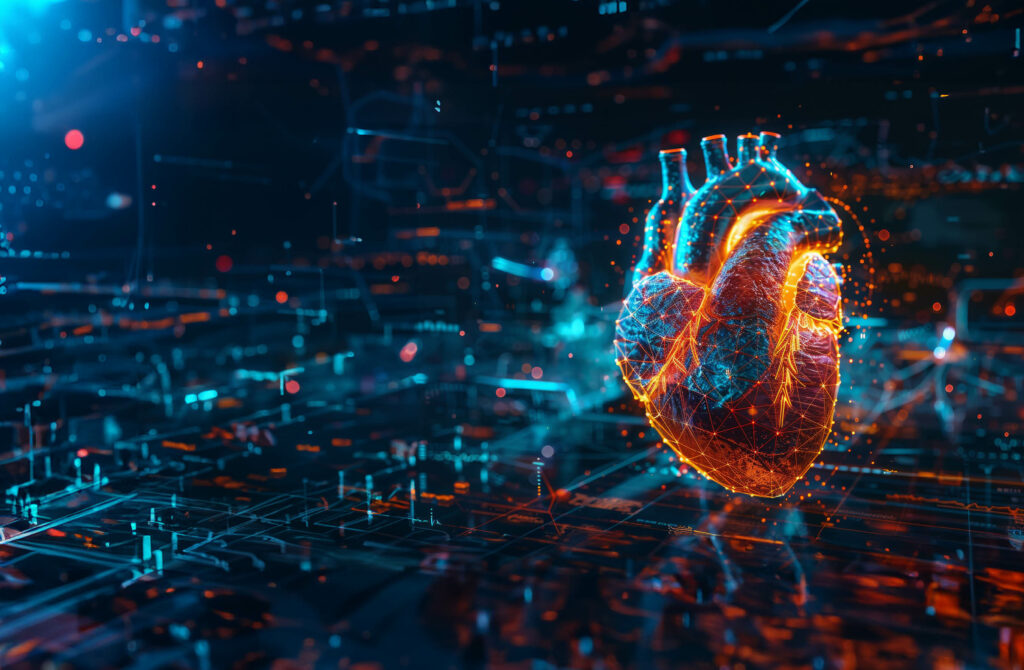

In [ ]:
import pandas as pd #data processing

from sklearn.preprocessing import LabelEncoder #label encoding
from sklearn.preprocessing import MinMaxScaler #scaling
from sklearn.model_selection import train_test_split #splitting

#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#performance measures
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,RocCurveDisplay

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Over sampling
from imblearn.over_sampling import SMOTE
#Under sampling
from imblearn.under_sampling import RandomUnderSampler

#Hyperparametric tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pickle
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/heart_disease_dataset_5226.csv')
df

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol,heart_disease
0,69,112,83,Regular,Yes,151,No,208.0,Yes
1,32,197,84,No,No,118,No,205.0,Yes
2,78,184,75,Rare,Yes,239,No,168.0,Yes
3,38,185,75,Rare,Yes,191,No,247.0,Yes
4,41,103,65,No,Yes,238,No,167.0,Yes
...,...,...,...,...,...,...,...,...,...
5264,79,152,100,Regular,Yes,177,No,195.0,Yes
5265,18,128,85,Rare,No,135,No,223.0,No
5266,29,169,87,Regular,No,200,Yes,244.0,Yes
5267,21,158,60,No,Yes,110,No,288.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5269 non-null   int64  
 1   systolic_pressure   5269 non-null   int64  
 2   diastolic_pressure  5269 non-null   int64  
 3   physical_activity   4743 non-null   object 
 4   smoking             5269 non-null   object 
 5   diabetes            5269 non-null   int64  
 6   alcohol             5269 non-null   object 
 7   total_cholesterol   4743 non-null   float64
 8   heart_disease       5269 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 370.6+ KB


In [ ]:
df['heart_disease'].value_counts()

,count
heart_disease,
Yes,4850
No,419


# Checking for missing values

In [ ]:
df.isna().sum()

,0
age,0
systolic_pressure,0
diastolic_pressure,0
physical_activity,526
smoking,0
diabetes,0
alcohol,0
total_cholesterol,526
heart_disease,0


# Checking data types

In [ ]:
df.dtypes

,0
age,int64
systolic_pressure,int64
diastolic_pressure,int64
physical_activity,object
smoking,object
diabetes,int64
alcohol,object
total_cholesterol,float64
heart_disease,object


# EDA

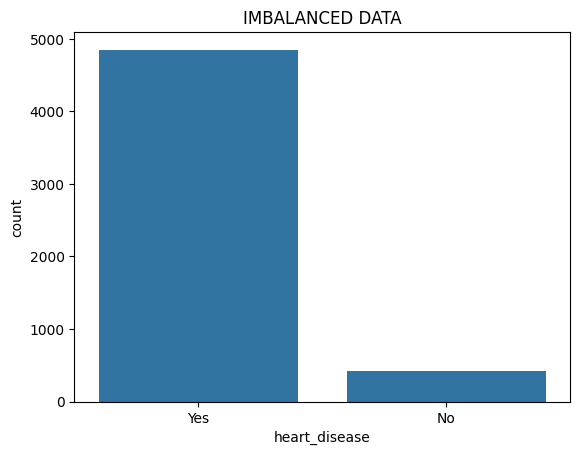

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='heart_disease',data=df)
plt.title("IMBALANCED DATA")
plt.show()

This shows the imbalance between the classes

<Axes: xlabel='heart_disease', ylabel='age'>

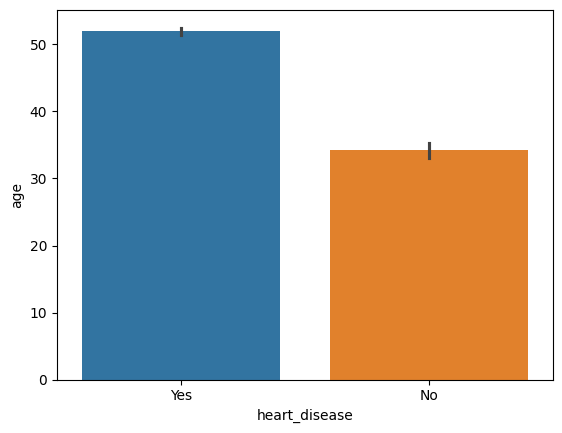

In [ ]:
sns.barplot(x='heart_disease',y='age',data=df,hue='heart_disease')

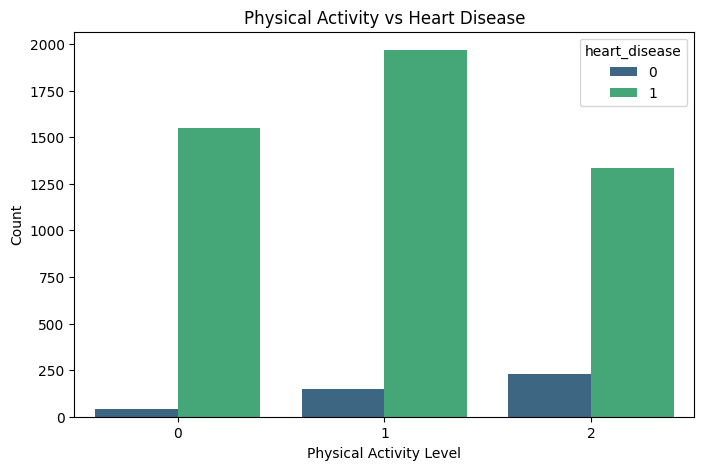

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['physical_activity'], hue=df['heart_disease'], palette="viridis")
plt.title("Physical Activity vs Heart Disease")
plt.xlabel("Physical Activity Level")
plt.ylabel("Count")
plt.show()


Higher physical activity is linked to a lower risk of heart disease.

People with low or no physical activity have a higher count of heart disease cases.

Individuals with moderate or high physical activity tend to have fewer cases of heart disease.

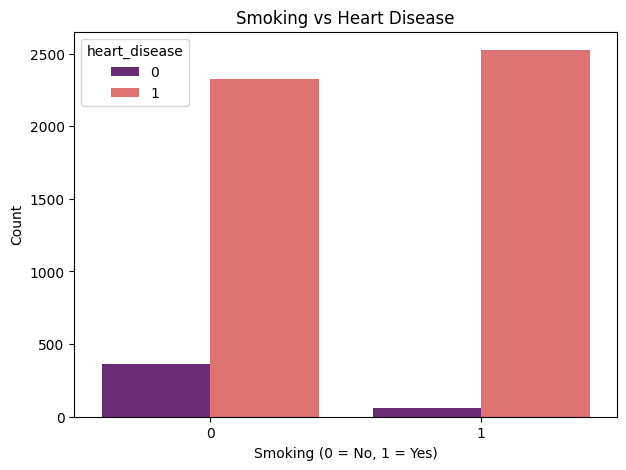

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['smoking'], hue=df['heart_disease'], palette="magma")
plt.title("Smoking vs Heart Disease")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Higher proportion of smokers have heart disease.
The count of heart disease cases is visibly higher among smokers compared to non-smokers.
Smoking is likely a significant risk factor for heart disease.

# Handling missing values

In [ ]:
df['total_cholesterol'].unique()

array([208., 205., 168., 247., 167., 275., 291., 230., 248., 244.,  nan,
       182., 220., 307., 290., 246., 245., 293., 189., 204., 243., 198.,
       278., 272., 257., 264., 211., 215., 170., 274., 287., 256., 222.,
       186., 253., 304., 281., 260., 299., 280., 231., 221., 210., 171.,
       195., 251., 302., 288., 282., 227., 252., 184., 298., 212., 214.,
       286., 185., 258., 192., 240., 301., 239., 297., 292., 249., 303.,
       294., 254., 250., 202., 193., 284., 233., 224., 196., 289., 183.,
       300., 225., 268., 270., 175., 213., 242., 176., 209., 241., 173.,
       181., 255., 263., 169., 197., 285., 277., 266., 206., 271., 295.,
       219., 305., 180., 187., 226., 199., 236., 203., 190., 232., 172.,
       188., 194., 269., 259., 179., 217., 296., 174., 228., 306., 237.,
       177., 229., 267., 218., 283., 261., 238., 276., 207., 201., 191.,
       262., 273., 235., 178., 279., 234., 200., 216., 265., 223.])

As they dont have any decimal values inside 'total_cholestrol' so we can use mode

In [ ]:
df['total_cholesterol']=df['total_cholesterol'].fillna(df['total_cholesterol'].mode()[0])
df['physical_activity']=df['physical_activity'].fillna(df['physical_activity'].mode()[0])

# Label encoding

In [ ]:
encoder=LabelEncoder()
cols=['physical_activity','smoking','alcohol','heart_disease']
for col in cols:
  df[col]=encoder.fit_transform(df[col])

In [ ]:
df.describe()

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol,heart_disease
count,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000
mean,50.582084,150.668058,79.916113,0.995635,0.490036,208.420383,0.519453,238.056557,0.920478
std,19.042602,28.986684,11.720201,0.773383,0.499948,63.430131,0.499669,38.717929,0.270577
min,18.000000,100.000000,60.000000,0.000000,0.000000,100.000000,0.000000,167.000000,0.000000
25%,34.000000,125.000000,70.000000,0.000000,0.000000,154.000000,0.000000,205.000000,1.000000
50%,50.000000,151.000000,80.000000,1.000000,0.000000,208.000000,1.000000,244.000000,1.000000
75%,67.000000,176.000000,90.000000,2.000000,1.000000,263.000000,1.000000,267.000000,1.000000
max,83.000000,200.000000,100.000000,2.000000,1.000000,320.000000,1.000000,307.000000,1.000000


# Splitting features and target

In [ ]:
X=df.iloc[:,:-1]
X

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol
0,69,112,83,2,1,151,0,208.0
1,32,197,84,0,0,118,0,205.0
2,78,184,75,1,1,239,0,168.0
3,38,185,75,1,1,191,0,247.0
4,41,103,65,0,1,238,0,167.0
...,...,...,...,...,...,...,...,...
5264,79,152,100,2,1,177,0,195.0
5265,18,128,85,1,0,135,0,223.0
5266,29,169,87,2,0,200,1,244.0
5267,21,158,60,0,1,110,0,288.0


In [ ]:
y=df.iloc[:,-1]
y

,heart_disease
0,1
1,1
2,1
3,1
4,1
...,...
5264,1
5265,0
5266,1
5267,1


In [ ]:
X.shape

(5269, 8)

In [ ]:
y.shape

(5269,)

#   Scaling - MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# Splitting data for training and testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

# Building Models

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
dt=DecisionTreeClassifier()
nb=GaussianNB()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier()
models=[knn,sv,dt,nb,rf,ab]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("*****************************************************")
  print("MODEL NAME :",model)
  print("ACCURACY SCORE",(round(accuracy_score(y_test,y_pred)*100,2)),"%")
  print(classification_report(y_test,y_pred))




*****************************************************
MODEL NAME : KNeighborsClassifier()
ACCURACY SCORE 94.94 %
              precision    recall  f1-score   support

           0       0.79      0.59      0.68       143
           1       0.96      0.98      0.97      1438

    accuracy                           0.95      1581
   macro avg       0.88      0.79      0.83      1581
weighted avg       0.95      0.95      0.95      1581

*****************************************************
MODEL NAME : SVC()
ACCURACY SCORE 95.07 %
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       143
           1       0.95      1.00      0.97      1438

    accuracy                           0.95      1581
   macro avg       0.93      0.75      0.81      1581
weighted avg       0.95      0.95      0.94      1581

*****************************************************
MODEL NAME : DecisionTreeClassifier()
ACCURACY SCORE 95.95 %
              precisio

We can observe that there is a imbalance in support as most of them are majority class 1 that indicates heart disease

In [ ]:
# Xd=df.drop(['diastolic_pressure','total_cholesterol','heart_disease'],axis=1)
# Xd

# Over sampling
Oversampling and undersampling are techniques used to address imbalanced data in machine learning.

In [ ]:
os=SMOTE(sampling_strategy='minority',random_state=1)


X_os,y_os=os.fit_resample(X,y)
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
X_os_scaled=scaler.fit_transform(X_os)
X_os_scaled

array([[0.78461538, 0.12      , 0.575     , ..., 0.23181818, 0.        ,
        0.29285714],
       [0.21538462, 0.97      , 0.6       , ..., 0.08181818, 0.        ,
        0.27142857],
       [0.92307692, 0.84      , 0.375     , ..., 0.63181818, 0.        ,
        0.00714286],
       ...,
       [0.07692308, 0.18      , 0.325     , ..., 0.06363636, 0.        ,
        0.67589816],
       [0.30769231, 0.31      , 0.1       , ..., 0.23636364, 0.        ,
        0.61428571],
       [0.07692308, 0.78      , 0.95      , ..., 0.21363636, 0.        ,
        0.26982389]])

In [ ]:
X_train_os.shape

(6790, 8)

In [ ]:
X_test_os.shape

(2910, 8)

In [ ]:
len(X_os)

9700

**Model Building - Oversampling**

In [ ]:
knn1=KNeighborsClassifier()
sv1=SVC()
dt1=DecisionTreeClassifier()
nb1=GaussianNB()
rf1=RandomForestClassifier(random_state=1)
ab1=AdaBoostClassifier()
acc=[]
models=[knn1,sv1,dt1,nb1,rf1,ab1]
for model in models:
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print("*****************************************************")
  print("MODEL NAME :",model)
  print("ACCURACY SCORE",(round(accuracy_score(y_test_os,y_pred_os)*100,2)),"%")
  print(classification_report(y_test_os,y_pred_os))
  acc.append(accuracy_score(y_test_os,y_pred_os))

*****************************************************
MODEL NAME : KNeighborsClassifier()
ACCURACY SCORE 91.75 %
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1455
           1       0.99      0.84      0.91      1455

    accuracy                           0.92      2910
   macro avg       0.93      0.92      0.92      2910
weighted avg       0.93      0.92      0.92      2910

*****************************************************
MODEL NAME : SVC()
ACCURACY SCORE 84.33 %
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1455
           1       0.87      0.80      0.84      1455

    accuracy                           0.84      2910
   macro avg       0.85      0.84      0.84      2910
weighted avg       0.85      0.84      0.84      2910

*****************************************************
MODEL NAME : DecisionTreeClassifier()
ACCURACY SCORE 97.32 %
              precisio

In [ ]:
X_test_os.shape

(2910, 8)

In [ ]:
X_train_os.shape

(6790, 8)

In [ ]:
y_os.value_counts()

,count
heart_disease,
1,4850
0,4850


# Under sampling

In [ ]:
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X_scaled,y)
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us)

In [ ]:
knn2=KNeighborsClassifier()
sv2=SVC()
dt2=DecisionTreeClassifier()
nb2=GaussianNB()
rf2=RandomForestClassifier(random_state=1)
ab2=AdaBoostClassifier()
models=[knn2,sv2,dt2,nb2,rf2,ab2]
for model in models:
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print("*****************************************************")
  print("MODEL NAME :",model)
  print("ACCURACY SCORE",(round(accuracy_score(y_test_us,y_pred_us)*100,2)),"%")
  print(classification_report(y_test_us,y_pred_us))

*****************************************************
MODEL NAME : KNeighborsClassifier()
ACCURACY SCORE 88.1 %
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       121
           1       0.93      0.78      0.85        89

    accuracy                           0.88       210
   macro avg       0.89      0.87      0.87       210
weighted avg       0.89      0.88      0.88       210

*****************************************************
MODEL NAME : SVC()
ACCURACY SCORE 92.38 %
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       121
           1       0.93      0.89      0.91        89

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210

*****************************************************
MODEL NAME : DecisionTreeClassifier()
ACCURACY SCORE 91.9 %
              precision 

# Best Model - RandomForestClassifier - Oversampled (98.63%)

# Feature Selction

<Axes: >

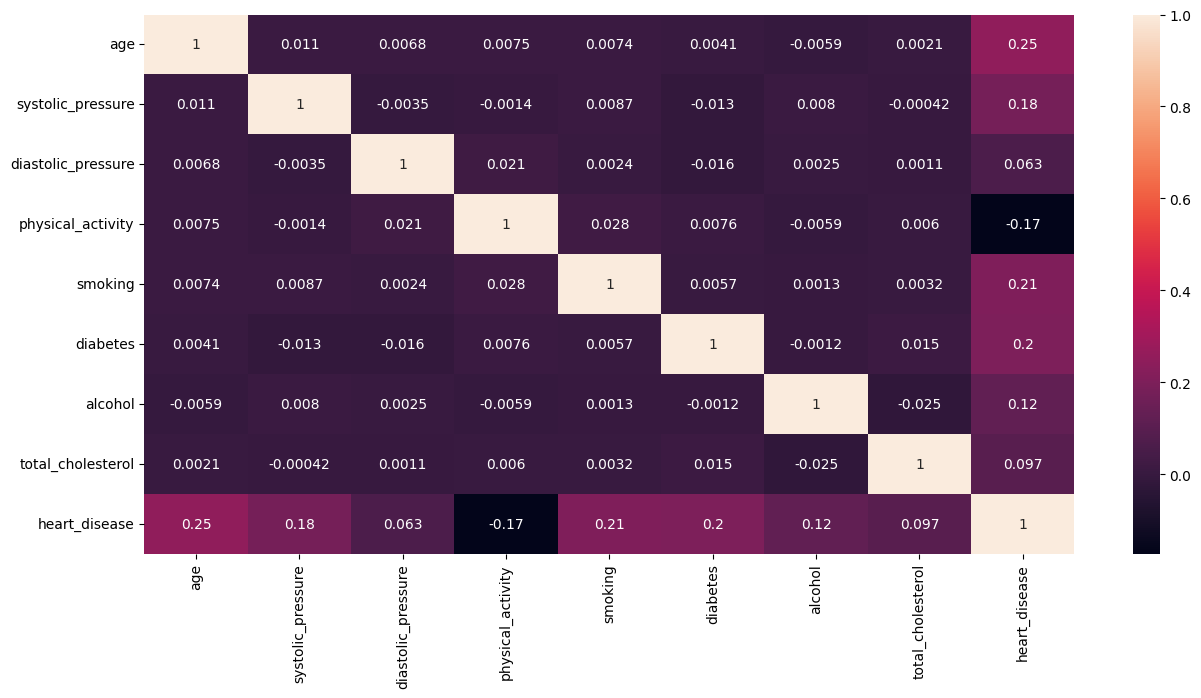

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True) #cmap='coolwarm'

Strongest Correlations with Heart Disease:

Age : Older individuals are more likely to have heart disease.

Systolic Blood Pressure : Higher systolic pressure is moderately associated with heart disease.

Smoking : Smoking has a notable positive correlation with heart disease.


Diabetes : Diabetes is linked to an increased risk of heart disease.

Alcohol and Total Cholesterol : These have weaker positive correlations with heart disease.

Negative Correlation:

Physical Activity : Higher physical activity is associated with a lower risk of heart disease.

In [ ]:
df.corr()

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol,heart_disease
age,1.000000,0.010603,0.006751,0.007494,0.007359,0.004092,-0.005928,0.002149,0.252692
systolic_pressure,0.010603,1.000000,-0.003456,-0.001360,0.008725,-0.012831,0.008041,-0.000417,0.177888
diastolic_pressure,0.006751,-0.003456,1.000000,0.020839,0.002384,-0.015930,0.002515,0.001104,0.063441
physical_activity,0.007494,-0.001360,0.020839,1.000000,0.027626,0.007575,-0.005920,0.005980,-0.172199
smoking,0.007359,0.008725,0.002384,0.027626,1.000000,0.005714,0.001346,0.003187,0.206736
diabetes,0.004092,-0.012831,-0.015930,0.007575,0.005714,1.000000,-0.001165,0.015118,0.202925
alcohol,-0.005928,0.008041,0.002515,-0.005920,0.001346,-0.001165,1.000000,-0.025450,0.124470
total_cholesterol,0.002149,-0.000417,0.001104,0.005980,0.003187,0.015118,-0.025450,1.000000,0.096971
heart_disease,0.252692,0.177888,0.063441,-0.172199,0.206736,0.202925,0.124470,0.096971,1.000000


Dropping columns that are insignificant

In [ ]:
X_os

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol
0,69,112,83,2,1,151,0,208.000000
1,32,197,84,0,0,118,0,205.000000
2,78,184,75,1,1,239,0,168.000000
3,38,185,75,1,1,191,0,247.000000
4,41,103,65,0,1,238,0,167.000000
...,...,...,...,...,...,...,...,...
9695,26,132,77,1,0,182,0,265.910355
9696,38,134,92,0,0,177,0,245.704810
9697,23,118,73,1,0,114,0,261.625742
9698,38,131,64,0,0,152,0,253.000000


In [ ]:
# X_os_df = pd.DataFrame(X_os, columns=X.columns)
# display(X_os_df)

Droping irrelavant columns and scaling them again

In [ ]:
X_os.drop(['diastolic_pressure','total_cholesterol'],axis=1,inplace=True)
scaler1=MinMaxScaler()
X_scaled_new=scaler1.fit_transform(X_os)

Splitting data for training and testing

In [ ]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_scaled_new,y_os,test_size=0.3,random_state=2)

Building Model with RandomForestClassifier

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1421
           1       0.99      0.95      0.97      1489

    accuracy                           0.97      2910
   macro avg       0.97      0.97      0.97      2910
weighted avg       0.97      0.97      0.97      2910



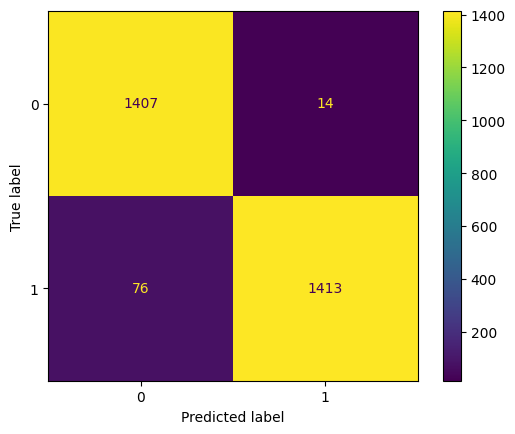

In [ ]:
rf.fit(X_train_new,y_train_new)
y_pred_new=rf.predict(X_test_new)
print(classification_report(y_test_new,y_pred_new))
print(ConfusionMatrixDisplay.from_predictions(y_test_new,y_pred_new))

In [ ]:
params={'n_estimators':[10,100],'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2'],'class_weight':['balanced', 'balanced_subsample'],'random_state':[1,3,4,5,7,42]}

In [ ]:
y_new=rf.predict(scaler1.transform([[18,128,85,1,0,135]]))
y_new.item()

1

In [ ]:
pickle.dump(rf,open('heart_model1.sav','wb'))
pickle.dump(scaler1,open('heart_scalerf1.sav','wb'))